In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 6) #set default figure size
import datetime

# download data from world bank using wbdata 
# check this web page for details: https://wbdata.readthedocs.io/en/latest/
import wbdata 

from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# import quantecon as qt
import statsmodels.api as sm

In [136]:
# function for log-linearization
def loglin(x):
    t = np.linspace(1,len(x),len(x)).reshape(-1,1) # need to reshape for univariate regression
    regression_model = LinearRegression()
    regression_model.fit(t,x)
    x_predicted = regression_model.predict(t)
    return x_predicted

In [137]:
# function for log-quadratic detrending
def logquad(x):
    t1 = np.linspace(1,len(x),len(x))
    t2 = t1 ** 2
    t = np.array([t1, t2]).T
    regression_model = LinearRegression()
    regression_model.fit(t,x)
    x_predicted = regression_model.predict(t)
    return x_predicted

In [138]:
# function for hp-filter
def hpfilter(x):
    cycle, trend = sm.tsa.filters.hpfilter(x, 100)
    return trend

In [139]:
# download data from world bank data set
countries = ["USA","KOR"]
indicators = {'NY.GDP.PCAP.KN':'y', 'NE.CON.PRVT.ZS':'c', 
             'NE.GDI.TOTL.ZS':'i', 'NE.CON.GOVT.ZS':'g', 
             'NE.IMP.GNFS.ZS':'im', 'NE.EXP.GNFS.ZS':'ex'}
data_date = datetime.datetime(1971, 1, 1), datetime.datetime(2019, 1, 1)
df = wbdata.get_dataframe(
    indicators, country=countries, date=data_date, parse_dates=False
)
# df.head()

In [140]:
dfu = df.unstack(level=0)

In [141]:
dfu_log = dfu.apply(np.log)
dfu_trend_loglin = dfu_log.apply(loglin)
# dfu_trend_loglin.head()

In [142]:
dfu_cyc_loglin = dfu_log - dfu_trend_loglin
# dfu_cyc_loglin.head()

In [143]:
dfu_cyc_loglin.std()

    country      
y   Korea, Rep.      0.149941
    United States    0.037905
c   Korea, Rep.      0.067907
    United States    0.012592
i   Korea, Rep.      0.121966
    United States    0.065058
g   Korea, Rep.      0.085203
    United States    0.048514
im  Korea, Rep.      0.164738
    United States    0.107813
ex  Korea, Rep.      0.165764
    United States    0.110376
dtype: float64

In [144]:
df_cyc_loglin = dfu_cyc_loglin.stack(level='country')
df_cyc_loglin_us = df_cyc_loglin.xs("United States", level="country")
# df_cyc_loglin_us.head()
df_cyc_loglin_us.corr()

/var/folders/rs/3t24n6592rs416m8hg8l28zw0000gn/T/ipykernel_82815/369484507.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_cyc_loglin = dfu_cyc_loglin.stack(level='country')


,y,c,i,g,im,ex
y,1.000000,0.452160,0.489967,-0.404369,0.491041,-0.142889
c,0.452160,1.000000,-0.349010,0.369685,0.318515,-0.137195
i,0.489967,-0.349010,1.000000,-0.717818,0.346893,-0.201135
g,-0.404369,0.369685,-0.717818,1.000000,-0.142669,-0.098982
im,0.491041,0.318515,0.346893,-0.142669,1.000000,0.500582
ex,-0.142889,-0.137195,-0.201135,-0.098982,0.500582,1.000000


In [145]:
df_cyc_loglin_korea = df_cyc_loglin.xs("Korea, Rep.", level="country")
df_cyc_loglin_korea.corr()

,y,c,i,g,im,ex
y,1.000000,-0.562793,0.655061,-0.805410,-0.433446,-0.154646
c,-0.562793,1.000000,-0.680220,0.528211,0.442261,-0.080126
i,0.655061,-0.680220,1.000000,-0.503941,-0.194730,-0.142876
g,-0.805410,0.528211,-0.503941,1.000000,0.576998,0.252114
im,-0.433446,0.442261,-0.194730,0.576998,1.000000,0.719105
ex,-0.154646,-0.080126,-0.142876,0.252114,0.719105,1.000000


In [146]:
dfu_trend_logquad = dfu_log.apply(logquad)
# dfu_trend_logquad.head()

In [147]:
dfu_cyc_logquad = dfu_log - dfu_trend_logquad
# dfu_cyc_logquad.head()

In [148]:
dfu_cyc_logquad.std()

    country      
y   Korea, Rep.      0.048118
    United States    0.026983
c   Korea, Rep.      0.052330
    United States    0.010137
i   Korea, Rep.      0.092235
    United States    0.064630
g   Korea, Rep.      0.061391
    United States    0.046769
im  Korea, Rep.      0.153954
    United States    0.087938
ex  Korea, Rep.      0.165759
    United States    0.109282
dtype: float64

In [149]:
df_cyc_logquad = dfu_cyc_logquad.stack(level='country')
df_cyc_logquad_us = df_cyc_logquad.xs("United States", level="country")
df_cyc_logquad_us.corr()

/var/folders/rs/3t24n6592rs416m8hg8l28zw0000gn/T/ipykernel_82815/3550472321.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_cyc_logquad = dfu_cyc_logquad.stack(level='country')


,y,c,i,g,im,ex
y,1.000000,0.061931,0.579062,-0.317224,0.145920,-0.342641
c,0.061931,1.000000,-0.521432,0.679574,-0.037648,-0.276649
i,0.579062,-0.521432,1.000000,-0.717739,0.346308,-0.220850
g,-0.317224,0.679574,-0.717739,1.000000,0.014119,-0.064604
im,0.145920,-0.037648,0.346308,0.014119,1.000000,0.519272
ex,-0.342641,-0.276649,-0.220850,-0.064604,0.519272,1.000000


In [150]:
df_cyc_logquad_korea = df_cyc_logquad.xs("Korea, Rep.", level="country")
df_cyc_logquad_korea.corr()

,y,c,i,g,im,ex
y,1.000000,0.164965,0.145714,-0.642924,-0.321457,-0.505442
c,0.164965,1.000000,-0.451698,0.155412,0.299195,-0.097386
i,0.145714,-0.451698,1.000000,-0.092182,0.053928,-0.195836
g,-0.642924,0.155412,-0.092182,1.000000,0.490427,0.357587
im,-0.321457,0.299195,0.053928,0.490427,1.000000,0.772536
ex,-0.505442,-0.097386,-0.195836,0.357587,0.772536,1.000000


In [151]:
dfu_trend_hp = dfu_log.apply(hpfilter)
dfu_cyc_hp = dfu_log - dfu_trend_hp
# dfu_cyc_hp.tail()

In [152]:
dfu_cyc_hp.std()

    country      
y   Korea, Rep.      0.028314
    United States    0.019539
c   Korea, Rep.      0.026501
    United States    0.006832
i   Korea, Rep.      0.069679
    United States    0.050157
g   Korea, Rep.      0.046064
    United States    0.028375
im  Korea, Rep.      0.089291
    United States    0.055065
ex  Korea, Rep.      0.104547
    United States    0.079483
dtype: float64

In [153]:
df_cyc_hp = dfu_cyc_hp.stack(level='country')
df_cyc_hp_us = df_cyc_hp.xs("United States", level="country")
df_cyc_hp_us.corr()

/var/folders/rs/3t24n6592rs416m8hg8l28zw0000gn/T/ipykernel_82815/1457120354.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_cyc_hp = dfu_cyc_hp.stack(level='country')


,y,c,i,g,im,ex
y,1.000000,-0.453689,0.794606,-0.622155,0.421901,-0.149338
c,-0.453689,1.000000,-0.631108,0.655429,-0.317259,-0.290038
i,0.794606,-0.631108,1.000000,-0.846116,0.487676,-0.153100
g,-0.622155,0.655429,-0.846116,1.000000,-0.427191,-0.103108
im,0.421901,-0.317259,0.487676,-0.427191,1.000000,0.600017
ex,-0.149338,-0.290038,-0.153100,-0.103108,0.600017,1.000000


In [154]:
df_cyc_hp_korea = df_cyc_hp.xs("Korea, Rep.", level="country")
df_cyc_hp_korea.corr()

,y,c,i,g,im,ex
y,1.000000,-0.432350,0.646290,-0.580401,-0.112836,-0.218356
c,-0.432350,1.000000,0.013046,0.457384,0.297674,-0.302321
i,0.646290,0.013046,1.000000,-0.277597,0.302412,-0.375962
g,-0.580401,0.457384,-0.277597,1.000000,0.112120,-0.145744
im,-0.112836,0.297674,0.302412,0.112120,1.000000,0.540637
ex,-0.218356,-0.302321,-0.375962,-0.145744,0.540637,1.000000


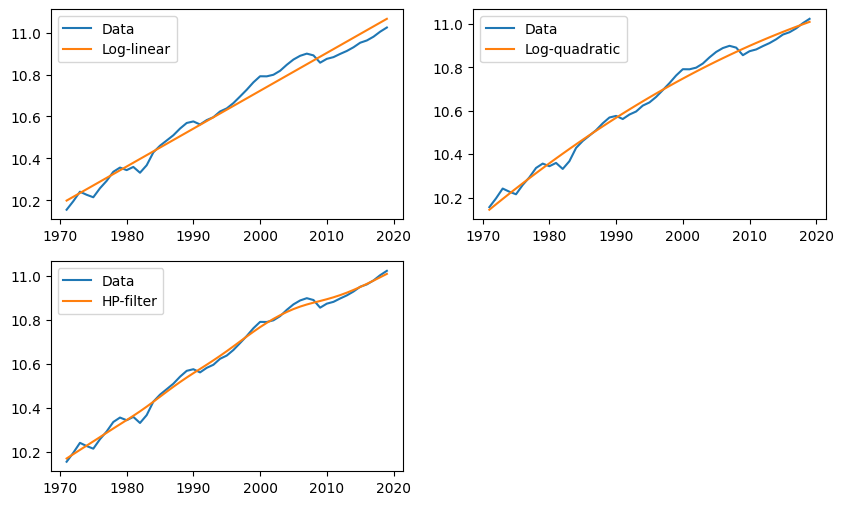

In [163]:
data = np.array([dfu_log[('y','United States')], 
                 dfu_trend_loglin[('y','United States')], 
                 dfu_trend_logquad[('y','United States')], 
                 dfu_trend_hp[('y','United States')]]).T
df_us = pd.DataFrame(data,index=np.linspace(1971,2019,49),columns=['Data','Log-linear','Log-quadratic','HP-filter'])

fig, ax = plt.subplots(2,2,sharex=False,sharey=False)
ax[1,1].remove() # remove the unused layout

df_us.plot(kind = 'line', 
           y = 'Data', 
           use_index = True, 
        #    linestyle = 'solid', 
         #   color = 'black', 
           ax = ax[0,0])
df_us.plot(kind = 'line', 
           y = 'Log-linear', 
           use_index = True, 
        #    linestyle = 'dashed', 
        #    color = 'red', 
           ax = ax[0,0])

df_us.plot(kind = 'line', 
           y = 'Data', 
           use_index = True, 
        #    linestyle = 'solid', 
        #    color = 'black', 
           ax = ax[0,1])
df_us.plot(kind = 'line', 
           y = 'Log-quadratic', 
           use_index = True, 
        #    linestyle = 'dashed', 
        #    color = 'red', 
           ax = ax[0,1])

df_us.plot(kind = 'line', 
           y = 'Data', 
           use_index = True, 
        #    linestyle = 'solid', 
        #    color = 'black', 
           ax = ax[1,0])
df_us.plot(kind = 'line', 
           y = 'HP-filter', 
           use_index = True, 
        #    linestyle = 'dashed', 
        #    color = 'red', 
           ax = ax[1,0])

plt.savefig('us.pdf',format='pdf')

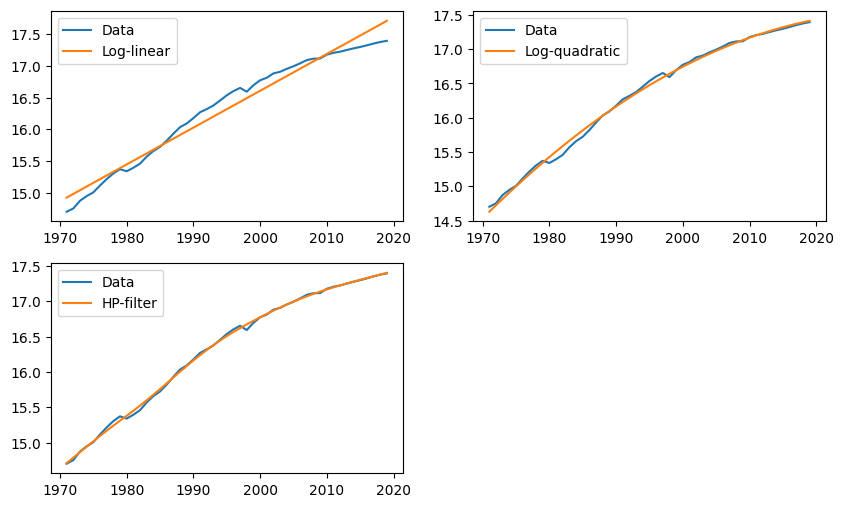

In [164]:
data = np.array([dfu_log[('y','Korea, Rep.')], 
                 dfu_trend_loglin[('y','Korea, Rep.')], 
                 dfu_trend_logquad[('y','Korea, Rep.')], 
                 dfu_trend_hp[('y','Korea, Rep.')]]).T
df_korea = pd.DataFrame(data,index=np.linspace(1971,2019,49),columns=['Data','Log-linear','Log-quadratic','HP-filter'])

fig, ax = plt.subplots(2,2,sharex=False,sharey=False)
ax[1,1].remove() # remove the unused layout

df_korea.plot(kind = 'line', 
           y = 'Data', 
           use_index = True, 
         #   linestyle = 'solid', 
          #  color = 'black', 
           ax = ax[0,0])
df_korea.plot(kind = 'line', 
           y = 'Log-linear', 
           use_index = True, 
         #   linestyle = 'dashed', 
        #    color = 'red', 
           ax = ax[0,0])

df_korea.plot(kind = 'line', 
           y = 'Data', 
           use_index = True, 
         #   linestyle = 'solid', 
        #    color = 'black', 
           ax = ax[0,1])
df_korea.plot(kind = 'line', 
           y = 'Log-quadratic', 
           use_index = True, 
         #   linestyle = 'dashed', 
        #    color = 'red', 
           ax = ax[0,1])

df_korea.plot(kind = 'line', 
           y = 'Data', 
           use_index = True, 
         #   linestyle = 'solid', 
        #    color = 'black', 
           ax = ax[1,0])
df_korea.plot(kind = 'line', 
           y = 'HP-filter', 
           use_index = True, 
        #   linestyle = 'dashed', 
        #    color = 'red', 
           ax = ax[1,0])

plt.savefig('korea.pdf',format='pdf')